In [60]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from scipy.optimize import minimize
import pandas as pd

In [61]:
def rastrigin(x):
    return 20 + np.sum(x**2 - 10*np.cos(2*np.pi*x), axis=0)

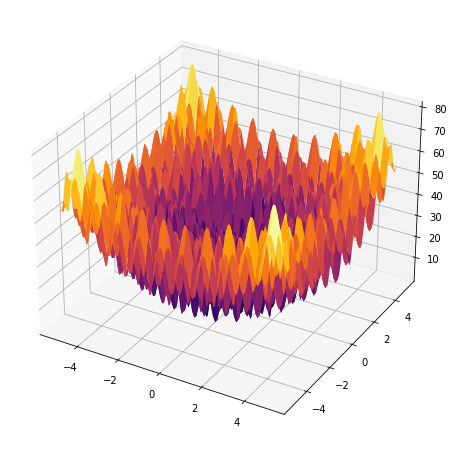

In [62]:
fig = plt.figure(figsize =[12, 8])
ax = fig.gca(projection = '3d')

X = np.arange(-5.12, 5.12, 0.1)
Y = np.arange(-5.12, 5.12, 0.1)
X, Y = np.meshgrid(X, Y)
Z = rastrigin(np.array([X, Y]))
surf = ax.plot_surface(X, Y, Z, cmap = 'inferno')
plt.show()

In [63]:
x0 = np.array([-1, 0.1])
res = minimize(rastrigin, x0, method='nelder-mead', options = {'xtol': 1e-8, 'disp': True})
res

Optimization terminated successfully.
         Current function value: 0.994959
         Iterations: 59
         Function evaluations: 114


 final_simplex: (array([[-9.94958637e-01, -2.23475440e-09],
       [-9.94958640e-01,  2.95947446e-09],
       [-9.94958637e-01,  7.47255718e-09]]), array([0.99495906, 0.99495906, 0.99495906]))
           fun: 0.9949590570932934
       message: 'Optimization terminated successfully.'
          nfev: 114
           nit: 59
        status: 0
       success: True
             x: array([-9.94958637e-01, -2.23475440e-09])

In [64]:
df = pd.DataFrame({'metric': ['Среднее значение целевой функции', 'Минимальное найденное значение целевой функции', 
                              'Среднее число итераций'], 
                   'd=2': ['','',''],
                   'd=4': ['','','']})
df

,metric,d=2,d=4
0,Среднее значение целевой функции,,
1,Минимальное найденное значение целевой функции,,
2,Среднее число итераций,,


In [81]:
itlist = []
reslist = []

for i in range(100):
    x0 = np.random.uniform(low=-5, high=5, size=(2,))
    res = minimize(rastrigin, x0, method='nelder-mead', options = {'xtol': 1e-8, 'disp': False})
    itlist.append(res.nit)
    reslist.append(rastrigin(res.x))

df['d=2'][0] = np.mean(reslist)
df['d=2'][1] = np.min(reslist) 
df['d=2'][2] = np.mean(itlist)

In [82]:
itlist = []
reslist = []

for i in range(100):
    x0 = np.random.uniform(low=-5, high=5, size=(4,))
    res = minimize(rastrigin, x0, method='nelder-mead', options = {'xtol': 1e-8, 'disp': False})
    itlist.append(res.nit)
    reslist.append(rastrigin(res.x))

# min_4 = np.min(reslist), mean_4 = np.mean(reslist), mean_it_4 = np.mean(itlist)
# np.min(reslist), np.mean(reslist), np.mean(itlist)
df['d=4'][0] = np.mean(reslist)
df['d=4'][1] = np.min(reslist) 
df['d=4'][2] = np.mean(itlist)
df

,metric,d=2,d=4
0,Среднее значение целевой функции,17.531069,14.097026
1,Минимальное найденное значение целевой функции,0.994959,-18.010082
2,Среднее число итераций,62.47,185.89
